In [ ]:
for t in np.arange(L,NN):
    (w[:,t+1],err[t],yest[t])=lms(y[t],x[t:t-L:-1],w[:,t],mu)

In [1]:
eqLabelWithNumbers=0
%run nbinit.ipy
js_addon()

... Configuring matplotlib formats
... Configuring matplotlib with inline figures
... Importing numpy as np, scipy as sp, pyplot as plt, scipy.stats as stats
   ... scipy.signal as sig
... Importing widgets, display, HTML, Image, Javascript
... Loading customized Javascript for LaTeX typesetting
Running js_addon


... Some LaTeX definitions


... Defining figures captions 


... Loading customized Javascript for interactive solutions (show/hide)
Overriding run-range javascript function


Running js_addon
interactive_init_cells was already defined -- reloading it


In [2]:
import mpld3
mpld3.enable_notebook()
import warnings
warnings.simplefilter('default')

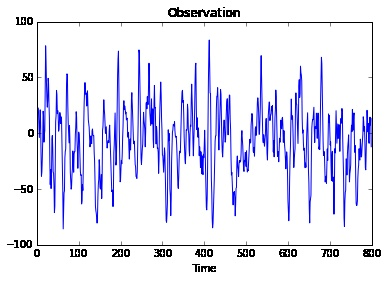

In [4]:
from scipy.signal import lfilter
# test
figplot=True
N=800
x=lfilter([1, 1], [1], np.random.randn(N))
htest=10*np.array([1, 0.7, 0.7, 0.7, 0.3, 0 ])
y0=lfilter(htest,[1],x)
y=y0+0.1*randn(N)
if figplot:
    plt.plot(y)
    plt.xlabel("Time")
    plt.title("Observation")
    figcaption("System output in an identification problem")

In [32]:
def lms(d,u,w,mu):
    """ 
    Implements a single iteration of the stochastic gradient (LMS)\n
    :math:`w(n+1)=w(n)+\\mu u(n)\\left(d(n)-w(n)^T u(n)\\right)̀`
    
    Input:
    ======
        d : desired sequence at time n 
        u : input of length p
        w : wiener filter to update 
        mu : adaptation step
    
    Returns:
    =======
        w : upated filter
        err : d-dest
        dest : prediction = :math:`u(n)^T w` 
    """
    u=squeeze(u) #Remove single-dimensional entries from the shape of an array.
    w=squeeze(w)
    dest=u.dot(w)
    err=d-dest
    w=w+mu*u*err
    return (w,err,dest)

In [6]:
def ident(observation,input_data,mu,p=20,h_initial=zeros(20),normalized=False):
    """ Identification of an impulse response from an observation
    `observation` of its output, and from its input `input_data` 
    `mu` is the adaptation step\n
    Inputs:
    =======
    observation: array
        output of the filter to identify
    input_data: array
        input of the filter to identify
    mu: real
        adaptation step
    p: int (default =20)
        order of the filter
    h_initial: array (default h_initial=zeros(20))
        initial guess for the filter
    normalized: boolean (default False)    
        compute the normalized LMS instead of the standard one
    
    Outputs:
    ========
    w: array
        identified impulse response
    err: array
        estimation error
    yest: array
        estimated output
    """
    N=np.size(input_data)
    err=np.zeros(N)
    w=np.zeros((p,N+1))
    yest=np.zeros(N)

    w[:,p]=h_initial
    for t in np.arange(p,N):   
        if normalized:
            assert mu<2, "In the normalized case, mu must be less than 2"
            mun=mu/(np.dot(input_data[t:t-p:-1],input_data[t:t-p:-1])+1e-10)   
        else:
            mun=mu
        (w[:,t+1],err[t],yest[t])=lms(observation[t],input_data[t:t-p:-1],w[:,t],mun)
        
    return (w,err,yest)

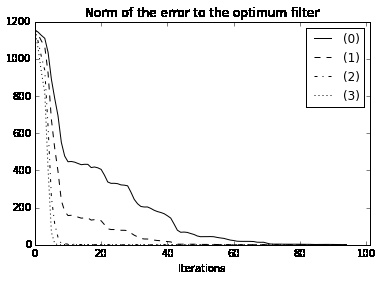

In [28]:
 # Study with respect to $\mu$    
p=6
NN=100
iter=np.arange(NN+1)-p

## Generate new datas
N=200
x=lfilter([1, 1], [1], np.random.randn(N))
htest=10*np.array([1, 0.7, 0.7, 0.7, 0.3, 0 ])
y0=lfilter(htest,[1],x)
y=y0+0.1*randn(N)
# --------------------
lsl=['-', '--', '-.', ':', '.', ',']  

for k,mu in enumerate([0.01, 0.02, 0.05, 0.081]):
    (w,erreur,yest)=ident(y,x,mu,p=p,h_initial=zeros(p))
    Errh=[sum(htest-w[:,n])**2 for n in range(NN+1)]
    plt.plot(iter,Errh, ls=lsl[k], color="black", label="({})".format(k))
    plt.xlim([0, NN+1])
    
plt.legend()
plt.title("Norm of the error to the optimum filter")
_=plt.xlabel("Iterations")
plt.savefig("conv_optfilter.png")
plt.savefig("conv_optfilter.pdf")
plt.savefig("conv_optfilter.jpg")


In [29]:
ls conv_optfilter.*


conv_optfilter.jpg  conv_optfilter.pdf  conv_optfilter.png


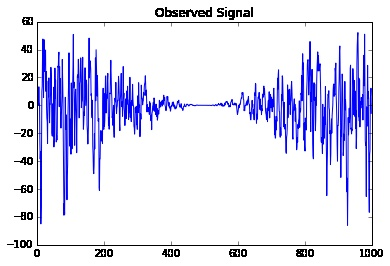

In [30]:
### Slow non-stationarity

N=1000
u=np.random.randn(N)
y=np.zeros(N)
htest=10*np.array([1, 0.7, 0.7, 0.7, 0.3, 0 ])
L=size(htest)
for t in np.arange(L,N):
    y[t]=dot((1+cos(2*pi*t/N))*htest,u[t:t-L:-1])
y+=0.01*np.random.randn(N)
plt.figure()
plt.plot(y)
_=plt.title("Observed Signal")

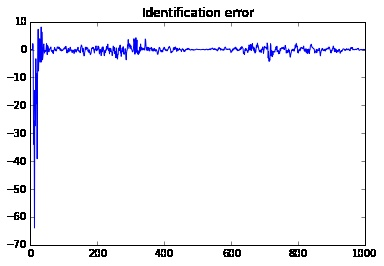

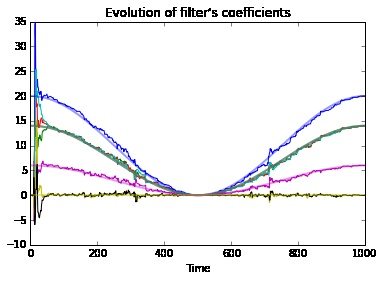

In [44]:
p=7
(w,err,yest)=ident(y,u,mu=0.14,p=p,h_initial=zeros(p))
#(w,err,yest)=ident(y,u,mu=1,p=p,h_initial=zeros(p),normalized=True)
plt.figure(1)
clf()
plt.plot(err)
plt.title('Identification error')
figcaption("Identification error in the nonstationary case", label="fig:error_ns_case")
plt.figure(2)
plt.clf()
t=np.arange(0,N+1)
true_ns_h=np.outer((1+cos(2*pi*t/N)),htest)
plt.plot(t,w.T,lw=1)

plt.plot(t,true_ns_h,lw=2,label="True values", alpha=0.4)
plt.title("Evolution of filter's coefficients")
plt.xlabel("Time")
plt.savefig("evo_filt_coef_mu0.png")
plt.savefig("evo_filt_coef_mu0.pdf")
plt.savefig("evo_filt_coef_mu0.jpg")
figcaption("Evolution of filter's coefficients", label="fig:coeff_ns_case")

In [45]:
ls -l evo_filt_coef*.*

-rw-r--r-- 1 bercherj bercherj 28294 mai    3 17:39 evo_filt_coef_mu0.jpg
-rw-r--r-- 1 bercherj bercherj 65466 mai    3 17:39 evo_filt_coef_mu0.pdf
-rw-r--r-- 1 bercherj bercherj 31817 mai    3 17:39 evo_filt_coef_mu0.png
-rw-r--r-- 1 bercherj bercherj 34712 mai    3 17:37 evo_filt_coef_mu1.jpg
-rw-r--r-- 1 bercherj bercherj 69355 mai    3 17:37 evo_filt_coef_mu1.pdf
-rw-r--r-- 1 bercherj bercherj 41703 mai    3 17:37 evo_filt_coef_mu1.png
